### Visualization

In [ ]:
import pandas as pd

# Paths to your files
file_path1 = '/Users/yujinlee/Google_Drive/NYU/Spring_2024/RBDA/project_data/0318.txt'
file_path2 = '/Users/yujinlee/Google_Drive/NYU/Spring_2024/RBDA/project_data/0613.txt'
file_path3 = '/Users/yujinlee/Google_Drive/NYU/Spring_2024/RBDA/project_data/1021.txt'

# Reading the files into DataFrames
output1 = pd.read_csv(file_path1, sep='\t', header=None)
output2 = pd.read_csv(file_path2, sep='\t', header=None)
output3 = pd.read_csv(file_path3, sep='\t', header=None)

# Concatenating the DataFrames
concat_df = pd.concat([output1, output2, output3])

# Optionally, save the concatenated DataFrame to a new file
output_file_path = '/Users/yujinlee/Google_Drive/NYU/Spring_2024/RBDA/project_data/concat_output'
concat_df.to_csv(output_file_path, sep='\t', index=False, header=False)
concat_df

,0,1,2,3,4,5,6
0,02adb1d6bc7233c0735dbefe9bb85ecd,80259,336x280,61,0,0.000760,0.000000
1,0abb99569043fe758ba6a51714782ced,80556,336x280,38,1,0.000472,0.026316
2,28425676c2469651ba969a88529eeec8,94213,468x60,62,0,0.000658,0.000000
3,2b79ac0b6110d91fbb1160dcce775b6d,37234,200x200,25,0,0.000671,0.000000
4,36391fa23e0928a93cd51ea8af344b82,44749,160x600,29,0,0.000648,0.000000
...,...,...,...,...,...,...,...
28,ebbd8035bba9def2a673154ee2486e7a,143024,1000x90,103,0,0.000720,0.000000
29,f206493d1a82b7d977075b20b7afd5f4,443271,300x250,270,3,0.000609,0.011111
30,f7e7cdcd8b8ed4d6682d78c5b8c4446c,132392,728x90,70,0,0.000529,0.000000
31,fa6d6688558d5e338490fe7c5984c822,183,300x300,0,0,0.000000,0.000000


/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_78735/2021164088.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Width'], data['Height'] = data['AdSize'].str.split('x').str


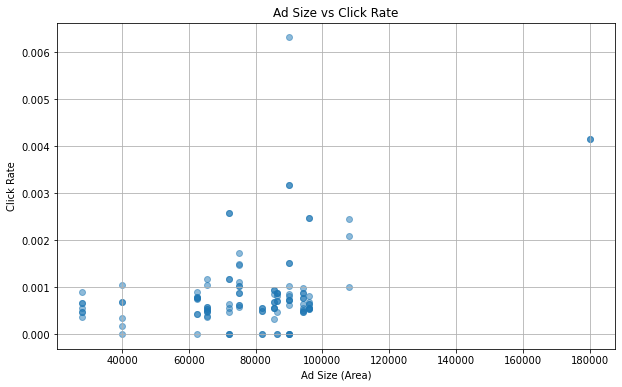

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/yujinlee/Google_Drive/NYU/Spring_2024/RBDA/project_data/concat_output'
data = pd.read_csv(file_path, sep='\t', header=None,
                   names=['AdCreativeID', 'Frequency', 'AdSize', 'Clicks', 'Conversions', 'ClickRate', 'ConversionRate'])

# Parse the AdSize to get width and height, then compute an area or use one dimension
data['Width'], data['Height'] = data['AdSize'].str.split('x').str
data['Width'] = pd.to_numeric(data['Width'])
data['Height'] = pd.to_numeric(data['Height'])
data['Area'] = data['Width'] * data['Height']  # You can decide to use Width, Height, or Area

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['ClickRate'], alpha=0.5)
plt.title('Ad Size vs Click Rate')
plt.xlabel('Ad Size (Area)')
plt.ylabel('Click Rate')
plt.grid(True)
plt.show()


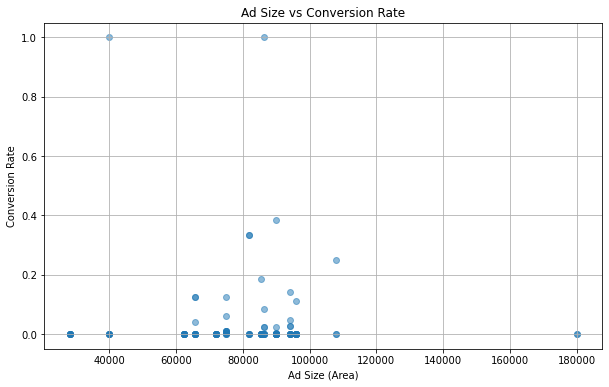

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['ConversionRate'], alpha=0.5)
plt.title('Ad Size vs Conversion Rate')
plt.xlabel('Ad Size (Area)')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


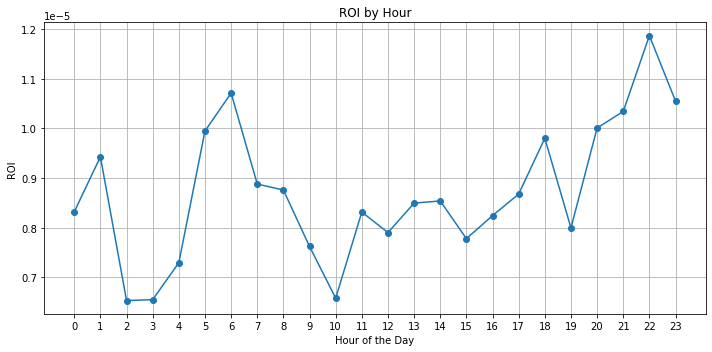

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the text file
file_path = '/Users/yujinlee/Downloads/roi.txt'  # Adjust the file path as necessary
data = pd.read_csv(file_path, sep="\t", header=None, names=['Hour', 'ROI'])

# Ensure data is sorted by Hour for correct plotting (in case it's not)
data = data.sort_values('Hour')

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data['Hour'], data['ROI'], marker='o', linestyle='-')
plt.title('ROI by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('ROI')
plt.grid(True)
plt.xticks(data['Hour'])  # Ensure all hours are marked
plt.tight_layout()
plt.show()

In [12]:
data.head()
data['mult']=1.0
data.loc[data['ROI']>=0.9*10**-5,'mult']=1.5
data.loc[data['ROI']<=0.7*10**-5,'mult']=0.5


In [13]:
dict(zip(data['Hour'],data['mult']))

{0: 1.0,
 1: 1.5,
 2: 0.5,
 3: 0.5,
 4: 1.0,
 5: 1.5,
 6: 1.5,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 0.5,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.5,
 19: 1.0,
 20: 1.5,
 21: 1.5,
 22: 1.5,
 23: 1.5}

Bid high if ROI >= 0.9 * 1e-5
<br> if hour = 1, 5, 6, 18, 20-23
<br>
<br>
Bid low if ROI <= 0.7 * 1e-5
<br> if hour = 2, 3, 10